# Clase 7 ejercicio

El objetivo de este ejercicio es más abierto que los anteriores. La idea es analizar el registro de llamadas al servicio 311 de la ciudad de Nueva York.

El dataset tiene datos de las quejas que llegan al 311. Entre los atributos presentes tenemos:

- Fecha de creación
- Fecha de cierre
- Tipo de queja
- Dirección
- Barrio
- Status
- Open Data Channel Type (por que medio se registro la queja)
- Latitud y longitud

In [25]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
sns.set(rc={'figure.figsize': (12,8)})

In [27]:
!cat data/311-complaints.tar.gz.part* > data/311-complaints.tar.gz

In [28]:
df = pd.read_csv('data/311-complaints.tar.gz',
                 compression='gzip',
                 parse_dates=['Created Date', 'Closed Date'],
                 dtype={'Incident Zip': 'object'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293929 entries, 0 to 2293928
Data columns (total 16 columns):
311-complaints.csv        float64
Unique Key                float64
Created Date              datetime64[ns]
Closed Date               datetime64[ns]
Complaint Type            object
Descriptor                object
Location Type             object
Incident Zip              object
Incident Address          object
City                      object
Status                    object
Resolution Description    object
Borough                   object
Open Data Channel Type    object
Latitude                  float64
Longitude                 float64
dtypes: datetime64[ns](2), float64(4), object(10)
memory usage: 280.0+ MB


In [6]:
df.head()

311-complaints.csv  Unique Key        Created Date         Closed Date  \
0             79332.0  41903960.0 2019-03-08 11:23:00 2019-03-14 00:00:00   
1             47581.0  41844953.0 2019-02-27 18:39:00 2019-02-28 12:00:00   
2             67269.0  41882574.0 2019-03-05 02:01:40 2019-03-08 16:12:29   
3             36184.0  41824783.0 2019-02-26 15:37:52 2019-02-27 21:15:32   
4             49216.0  41848154.0 2019-03-01 09:40:39 2019-03-04 02:07:40   

                        Complaint Type                           Descriptor  \
0  Request Large Bulky Item Collection  Request Large Bulky Item Collection   
1                    Other Enforcement         E6 Commercial Waste Disposal   
2                       HEAT/HOT WATER                      ENTIRE BUILDING   
3                       HEAT/HOT WATER                      ENTIRE BUILDING   
4                       HEAT/HOT WATER                       APARTMENT ONLY   

          Location Type Incident Zip      Incident Address      City  Status  \
0              Sidewalk        10036  338 WEST   47 STREET  NEW YORK  Closed   
1              Sidewalk        10033  547 WEST  180 STREET  NEW YORK  Closed   
2  RESIDENTIAL BUILDING        10462  2100 BRONX PARK EAST     BRONX  Closed   
3  RESIDENTIAL BUILDING        10034      65 SEAMAN AVENUE  NEW YORK  Closed   
4  RESIDENTIAL BUILDING        10468  2461 DAVIDSON AVENUE     BRONX  Closed   

                              Resolution Description    Borough  \
0                                                NaN  MANHATTAN   
1  The Department of Sanitation investigated this...  MANHATTAN   
2  The complaint you filed is a duplicate of a co...      BRONX   
3  The Department of Housing Preservation and Dev...  MANHATTAN   
4  The complaint you filed is a duplicate of a co...      BRONX   

  Open Data Channel Type   Latitude  Longitude  
0                  PHONE  40.760905 -73.988676  
1                 MOBILE  40.848212 -73.933237  
2                  PHONE  40.853773 -73.869188  
3                 ONLINE  40.867912 -73.925512  
4                 ONLINE  40.863187 -73.901949

Vamos a hacer un mapa mostrando cuales quejas son resueltas más rápidamente.

Primero llenamos los valores vacíos del tipo de quejas por *unknown*

In [7]:
values = {'Complaint Type': 'unknown'}
df= df.fillna(value=values)

Convertimos ahora la variable a una variable categórica numérica

In [8]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
variable_to_convert = df[["Complaint Type"]]
variable_converted = ordinal_encoder.fit_transform(variable_to_convert)
df["Complaint Type"] = variable_converted

Realizamos un histograma de la variable

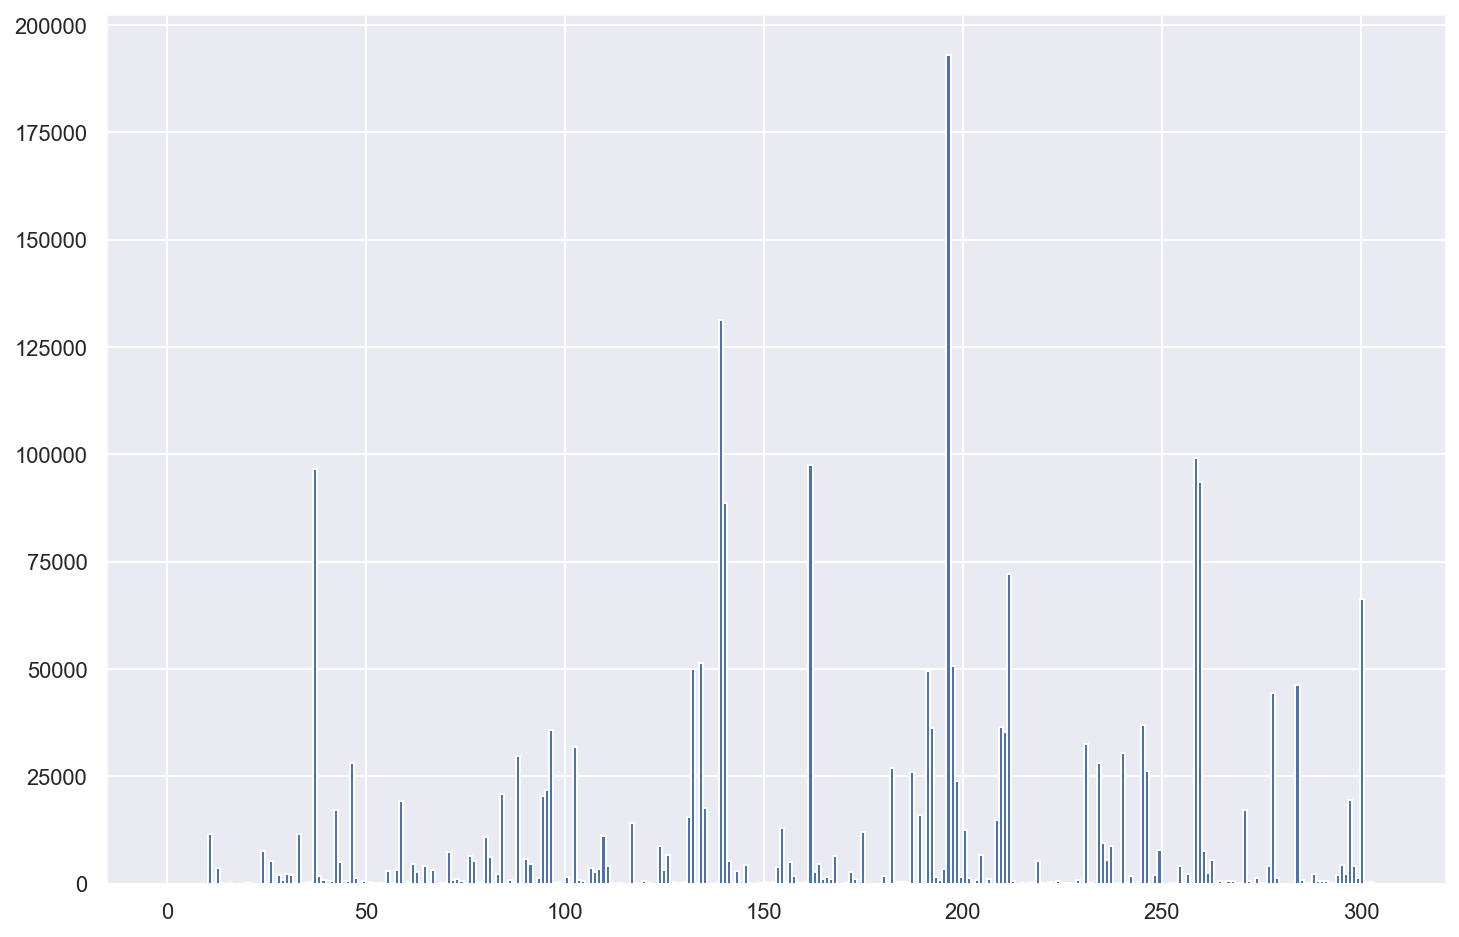

In [9]:
df["Complaint Type"].hist(bins = 300)

Contamos la frecuencia de cada tipo de queja

In [10]:
freq = df.groupby('Complaint Type').count()['Location Type'].values

para ver las categorías encodeadas por *ordinal_encoder* se puede usar el método .categories_ que nos da un array con las categorías. Buscamos en este caso la categoría 'unknown' 

In [29]:
np.where(ordinal_encoder.categories_[0] == 'unknown')

(array([306]),)

In [31]:
ordinal_encoder.categories_[0][306]

'unknown'

In [11]:
for i in range(len(freq)):
    if freq[i]<25000:
        df = df[df['Complaint Type']!= i]

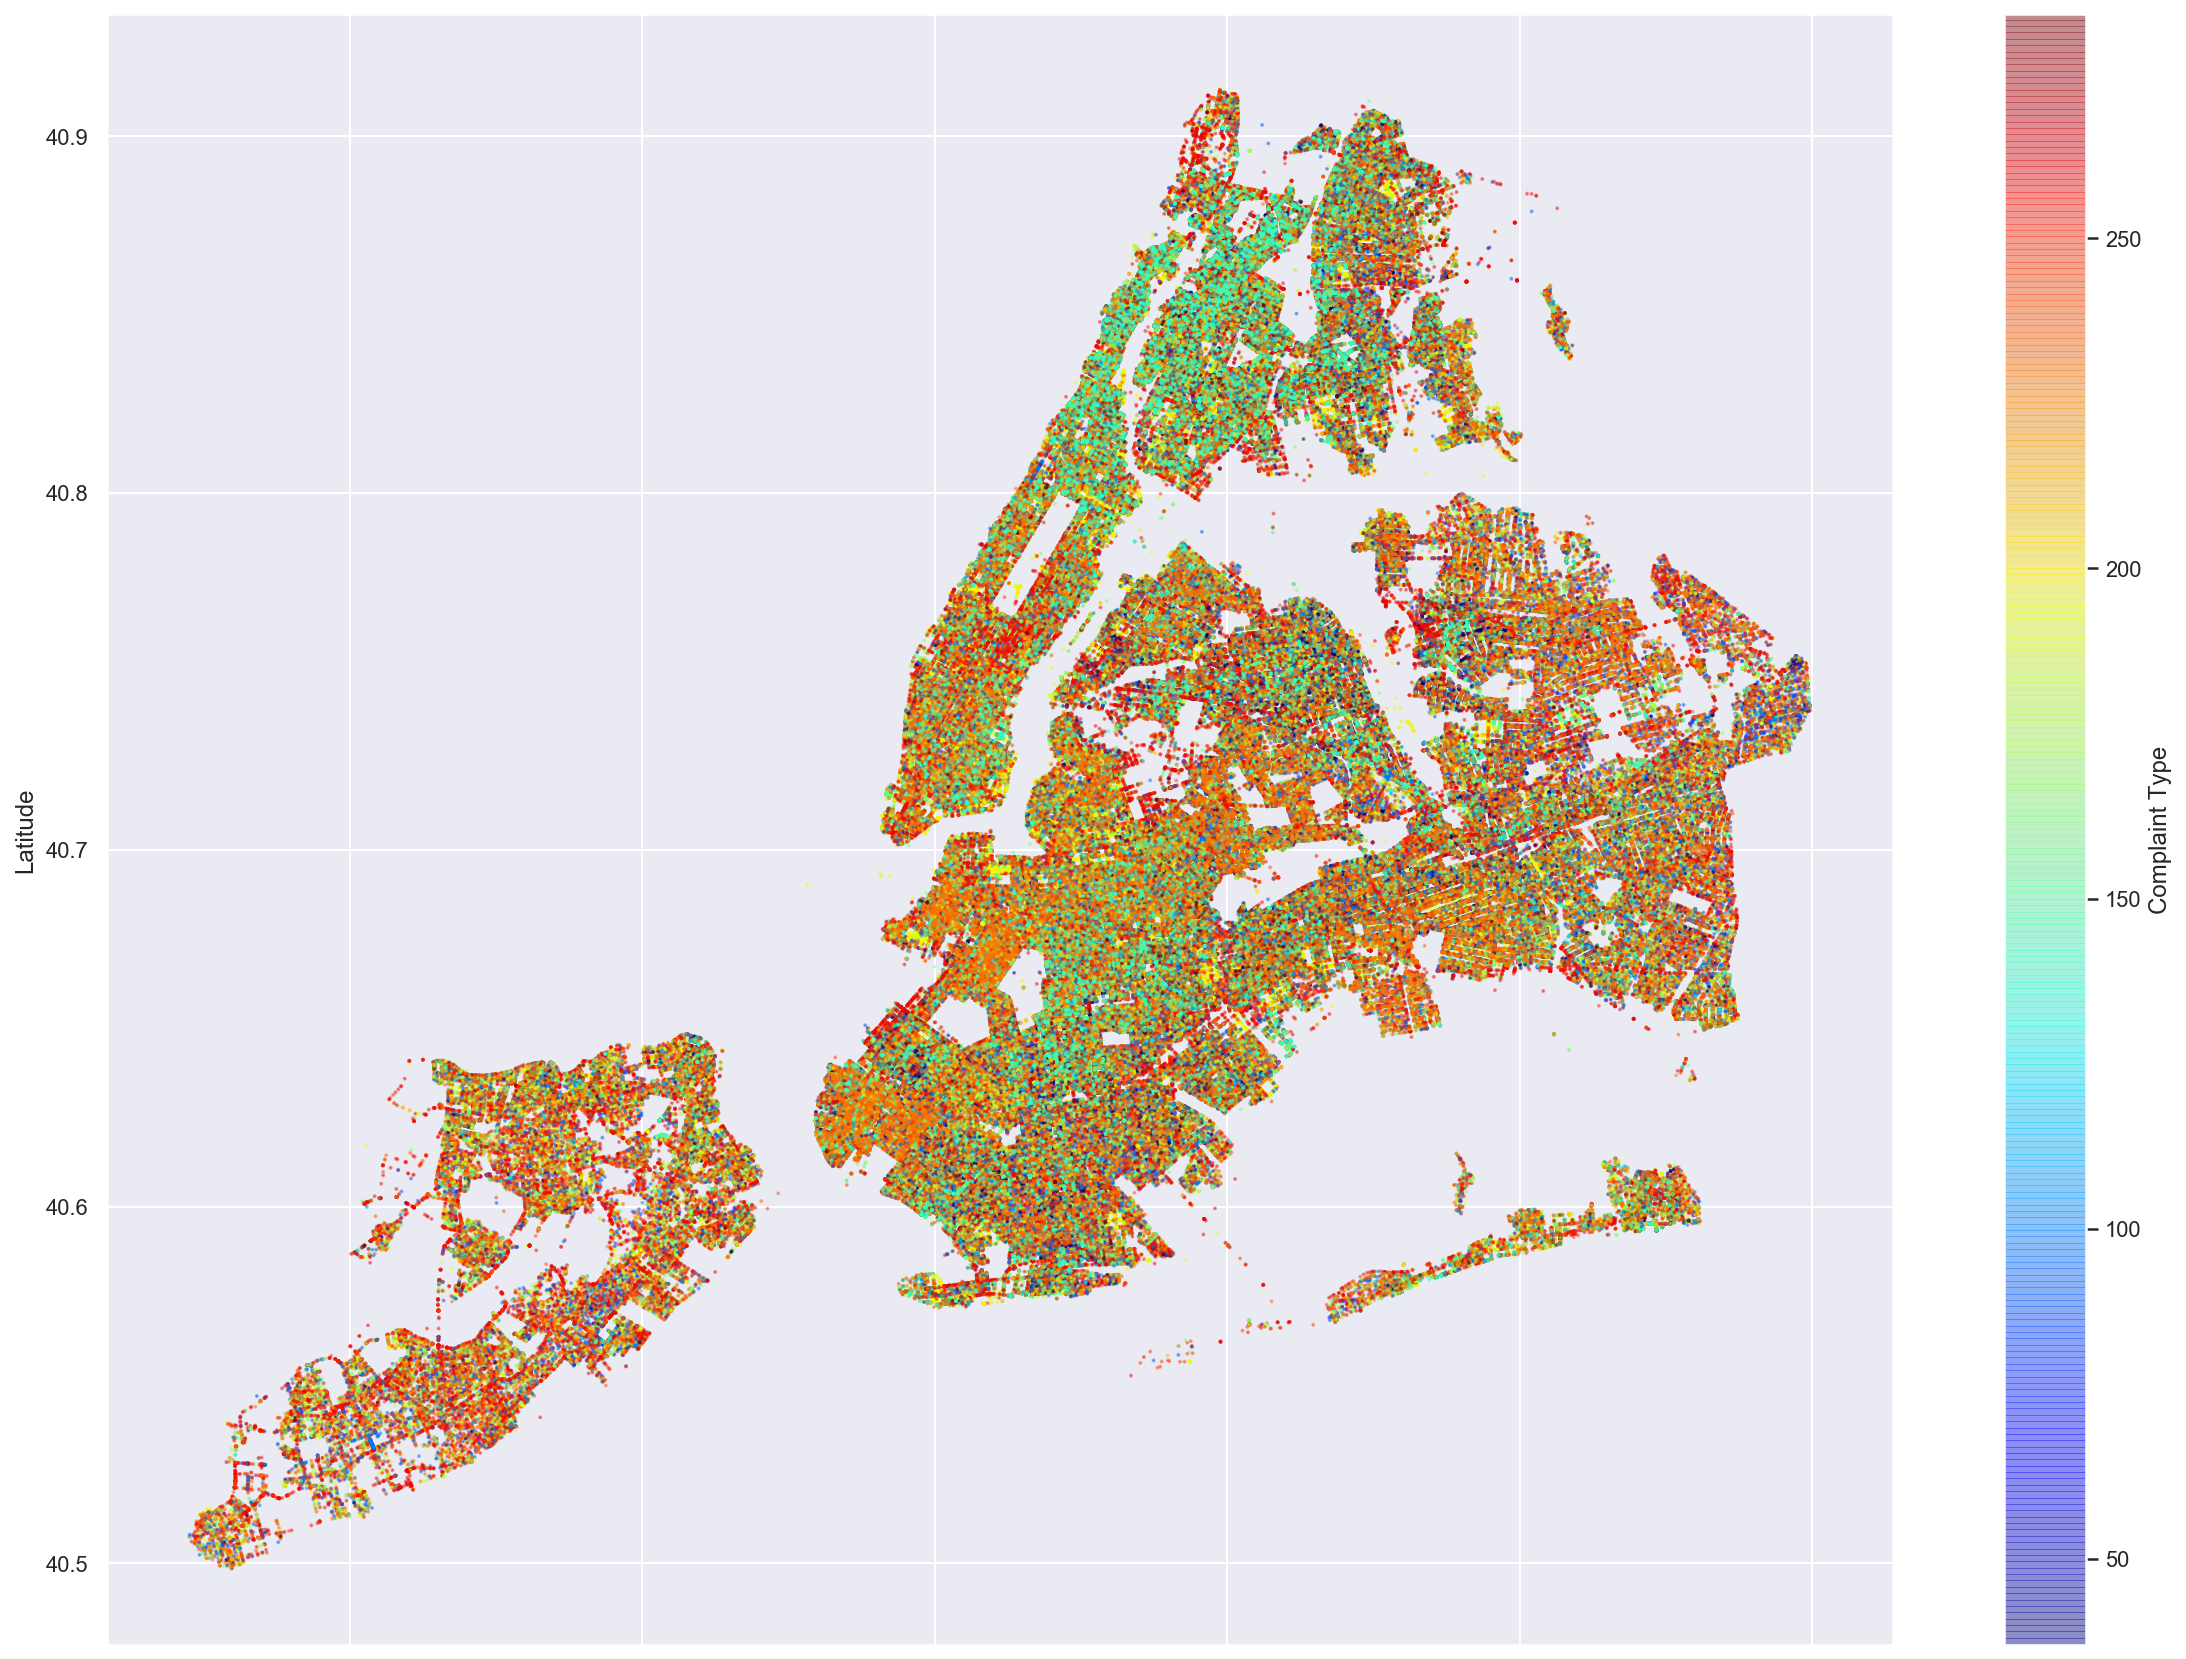

In [69]:
import matplotlib.pyplot as plt
df.plot(kind="scatter", x="Longitude", y="Latitude",s = 1, alpha=0.4, figsize=(20,15),
             c="Complaint Type", cmap=plt.get_cmap("jet"), colorbar=True);

In [12]:
df = df[~df['Closed Date'].isna()]

In [13]:
hola = df['Closed Date'] - df['Created Date']

In [14]:
df['time_still_closed'] = hola.astype('timedelta64[D]')

In [15]:
sum(df['time_still_closed'].isna())

0

In [16]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [17]:
freq_time = df.groupby('time_still_closed').count()['Location Type'].values

In [18]:
df = df[df["time_still_closed"]>0]
df = df[df["Location Type"] == 'Sidewalk']

In [19]:
df = df[df["time_still_closed"]<10]


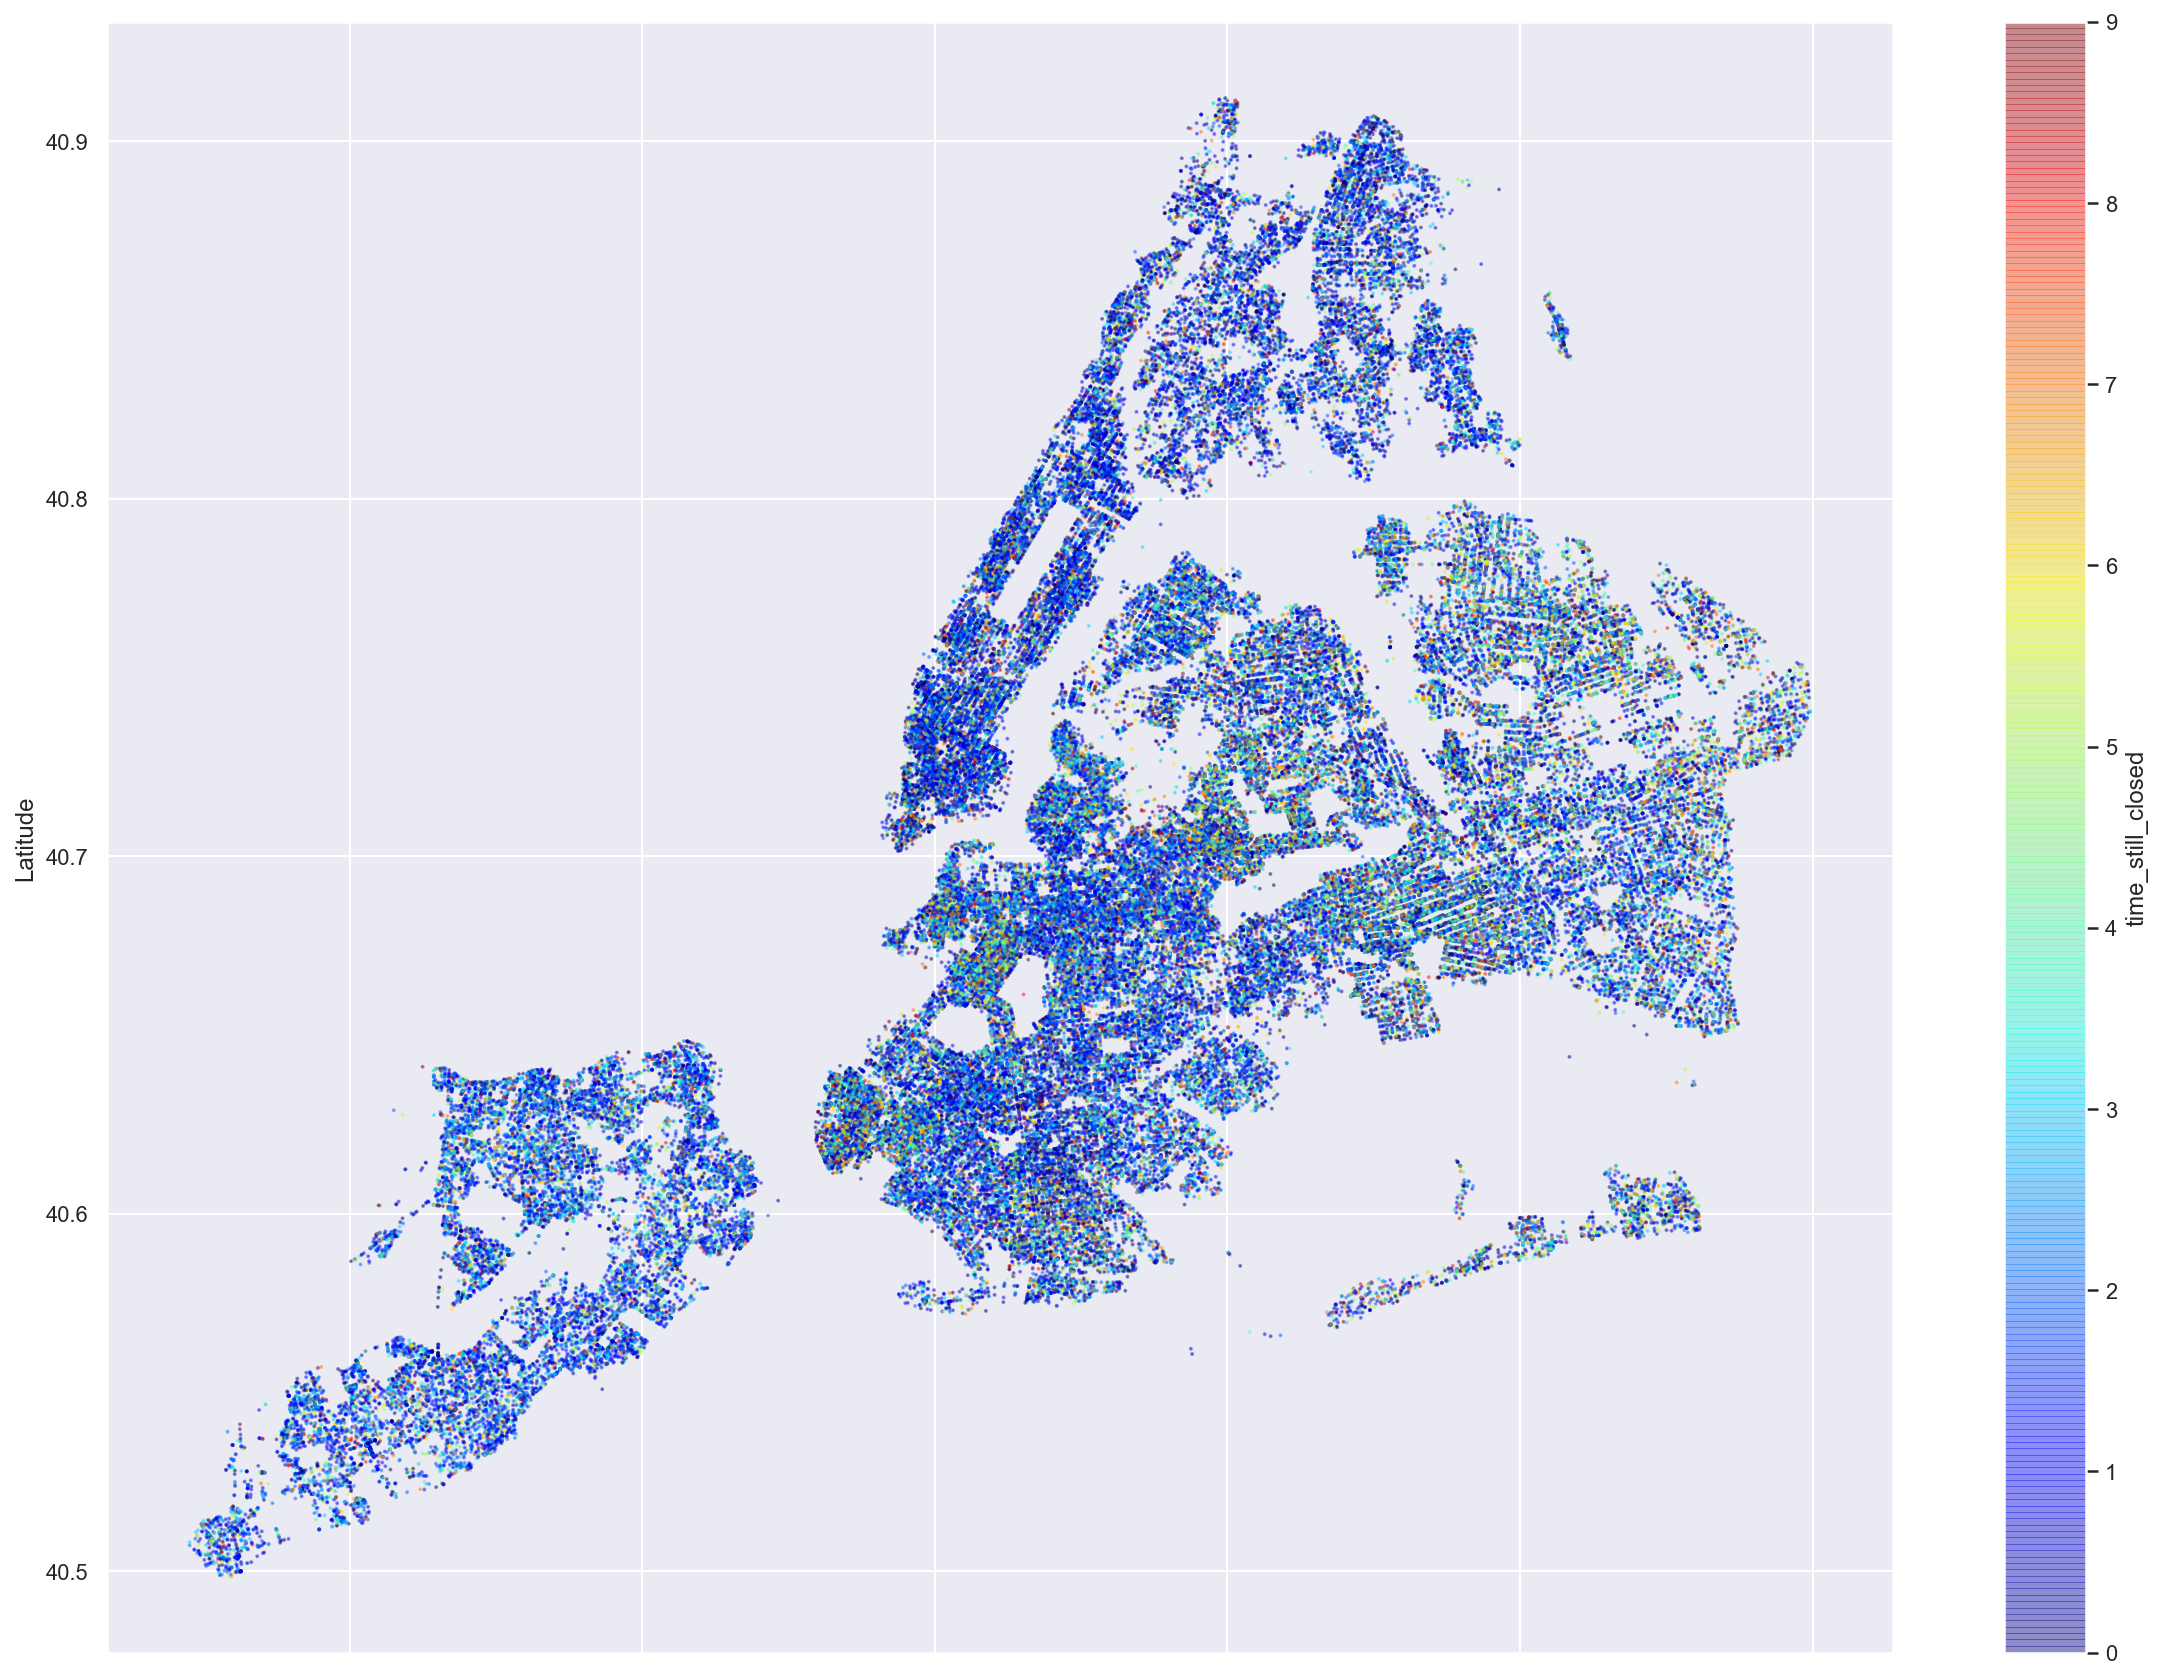

In [250]:
import matplotlib.pyplot as plt
df.plot(kind="scatter", x="Longitude", y="Latitude",s = 1, alpha=0.4, figsize=(20,15),
             c="time_still_closed", cmap=plt.get_cmap("jet"), colorbar=True);

predecimos **Complaint Type**

In [29]:
values = {'Complaint Type': 'unknown'}
df= df.fillna(value=values)

In [30]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [31]:
variable_to_convert = df[["Complaint Type"]]

In [32]:
df["Complaint Type"] = variable_converted

In [33]:
freq = df.groupby('Complaint Type').count()['Location Type'].values

In [34]:
for i in range(len(freq)):
    if freq[i]<25000:
        df = df[df['Complaint Type']!= i]

In [35]:
df = df.drop(columns = ['311-complaints.csv', 'Unique Key', 'Incident Zip', 'Incident Address'])

In [36]:
df = df[~df['Closed Date'].isna()]
df['time_still_closed'] = df['Closed Date'] - df['Created Date']

In [37]:
df['time_still_closed'] = df['time_still_closed'].astype('timedelta64[D]')

In [39]:
df = df.drop(columns = ['Created Date', 'Closed Date'])

In [40]:
df = df.drop(columns = ['Resolution Description'])

In [41]:
df = df.drop(columns = ['Descriptor'])

In [42]:
df

Complaint Type         Location Type        City  Status    Borough  \
0                 231.0              Sidewalk    NEW YORK  Closed  MANHATTAN   
2                 139.0  RESIDENTIAL BUILDING       BRONX  Closed      BRONX   
3                 139.0  RESIDENTIAL BUILDING    NEW YORK  Closed  MANHATTAN   
4                 139.0  RESIDENTIAL BUILDING       BRONX  Closed      BRONX   
5                 139.0  RESIDENTIAL BUILDING    BROOKLYN  Closed   BROOKLYN   
...                 ...                   ...         ...     ...        ...   
2293918           284.0  RESIDENTIAL BUILDING  Ozone Park  Closed     QUEENS   
2293919           240.0                Street   Ridgewood  Closed     QUEENS   
2293920           139.0  RESIDENTIAL BUILDING    BROOKLYN  Closed   BROOKLYN   
2293921           231.0              Sidewalk    BROOKLYN  Closed   BROOKLYN   
2293923           139.0  RESIDENTIAL BUILDING    NEW YORK  Closed  MANHATTAN   

        Open Data Channel Type   Latitude  Longitude  time_still_closed  
0                        PHONE  40.760905 -73.988676                5.0  
2                        PHONE  40.853773 -73.869188                3.0  
3                       ONLINE  40.867912 -73.925512                1.0  
4                       ONLINE  40.863187 -73.901949                2.0  
5                        PHONE  40.665731 -73.894281                0.0  
...                        ...        ...        ...                ...  
2293918                  PHONE  40.679518 -73.835758                7.0  
2293919                  PHONE  40.694603 -73.896121                3.0  
2293920                  PHONE  40.692453 -73.927973                1.0  
2293921                  PHONE  40.688291 -73.918548                2.0  
2293923                  PHONE  40.799753 -73.942221                1.0  

[1276072 rows x 9 columns]

Hacemos un fill de los valores nan y luego encodeamos las variables categóricas resstantes

In [43]:
values = {'Location Type': 'unknown', 'Status':'unknown', 'Borough': 'unknown','City':'unknown', 'Borough':'unknown', 'Open Data Channel Type': 'unknown'}
df= df.fillna(value=values)

In [44]:
ordinal_encoder = OrdinalEncoder()
variable_to_convert = df[["Location Type"]]

In [45]:
variable_converted = ordinal_encoder.fit_transform(variable_to_convert)
df["Location Type"] = variable_converted

In [46]:
ordinal_encoder = OrdinalEncoder()
variable_to_convert = df[["Status"]]
variable_converted = ordinal_encoder.fit_transform(variable_to_convert)
df["Status"] = variable_converted

In [47]:
ordinal_encoder = OrdinalEncoder()
variable_to_convert = df[["Borough"]]
variable_converted = ordinal_encoder.fit_transform(variable_to_convert)
df["Borough"] = variable_converted

In [48]:
ordinal_encoder = OrdinalEncoder()
variable_to_convert = df[["City"]]
variable_converted = ordinal_encoder.fit_transform(variable_to_convert)
df["City"] = variable_converted

In [49]:
ordinal_encoder = OrdinalEncoder()
variable_to_convert = df[["Open Data Channel Type"]]
variable_converted = ordinal_encoder.fit_transform(variable_to_convert)
df["Open Data Channel Type"] = variable_converted

In [50]:
df

Complaint Type  Location Type  City  Status  Borough  \
0                 231.0           45.0  58.0     1.0      2.0   
2                 139.0           35.0   9.0     1.0      0.0   
3                 139.0           35.0  58.0     1.0      2.0   
4                 139.0           35.0   9.0     1.0      0.0   
5                 139.0           35.0  10.0     1.0      1.0   
...                 ...            ...   ...     ...      ...   
2293918           284.0           35.0  65.0     1.0      3.0   
2293919           240.0           50.0  76.0     1.0      3.0   
2293920           139.0           35.0  10.0     1.0      1.0   
2293921           231.0           45.0  10.0     1.0      1.0   
2293923           139.0           35.0  58.0     1.0      2.0   

         Open Data Channel Type   Latitude  Longitude  time_still_closed  
0                           3.0  40.760905 -73.988676                5.0  
2                           3.0  40.853773 -73.869188                3.0  
3                           1.0  40.867912 -73.925512                1.0  
4                           1.0  40.863187 -73.901949                2.0  
5                           3.0  40.665731 -73.894281                0.0  
...                         ...        ...        ...                ...  
2293918                     3.0  40.679518 -73.835758                7.0  
2293919                     3.0  40.694603 -73.896121                3.0  
2293920                     3.0  40.692453 -73.927973                1.0  
2293921                     3.0  40.688291 -73.918548                2.0  
2293923                     3.0  40.799753 -73.942221                1.0  

[1276072 rows x 9 columns]

Separamos los datos en x e y.

In [319]:
x_columns = [ i for i in df.columns if i!='Complaint Type']

In [320]:
x_data = df[x_columns]

In [321]:
y_data = df['Complaint Type']

Separamos en train y test

In [322]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=66)

Entrenamos un random forest

In [323]:
from sklearn import model_selection# random forest model creation
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)# predictions
rfc_predict = rfc.predict(X_test)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [314]:
df = df[~df['Latitude'].isna()]
df = df[~df['Longitude'].isna()]

In [325]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

        37.0       0.70      0.77      0.73     28936
        88.0       0.63      0.65      0.64      7187
        96.0       0.58      0.58      0.58     10427
       103.0       0.14      0.12      0.13      8995
       132.0       0.26      0.27      0.26     14190
       139.0       0.68      0.76      0.72     39171
       140.0       0.54      0.54      0.54     25733
       162.0       0.69      0.66      0.68     28943
       182.0       0.42      0.44      0.43      7896
       187.0       0.17      0.14      0.15      7346
       192.0       1.00      0.99      0.99     10854
       196.0       0.99      0.99      0.99     57624
       197.0       0.71      0.65      0.68     14904
       210.0       0.23      0.21      0.22     10247
       211.0       0.22      0.21      0.22     10614
       212.0       0.23      0.23      0.23     20737
       231.0       0.59      0.63      0.61      9657
       234.0       0.98    

In [331]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_data)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y_labels = onehot_encoder.fit_transform(integer_encoded)

# invert first example


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [337]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_labels, test_size=0.3, random_state=66)

In [379]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras 
import keras.backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [388]:
opt_adam = keras.optimizers.Adagrad(learning_rate=0.01)

In [393]:
model = Sequential()
model.add(Dense(32, input_dim=len(x_train.columns), kernel_initializer='normal', activation='relu'))
model.add(Dense(16,kernel_initializer='normal', activation='relu'))
model.add(Dense(22,kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=opt_adam, metrics=['accuracy'])

In [394]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=5, verbose=1)

Train on 883645 samples, validate on 378705 samples
Epoch 1/5
883645/883645 [==============================] - 21s 24us/step - loss: 1.4175 - accuracy: 0.5457 - val_loss: 1.2589 - val_accuracy: 0.5688
Epoch 2/5
883645/883645 [==============================] - 20s 23us/step - loss: 1.2653 - accuracy: 0.5729 - val_loss: 1.2094 - val_accuracy: 0.5801
Epoch 3/5
883645/883645 [==============================] - 20s 23us/step - loss: 1.2077 - accuracy: 0.5819 - val_loss: 1.1756 - val_accuracy: 0.5854
Epoch 4/5
883645/883645 [==============================] - 20s 23us/step - loss: 1.1705 - accuracy: 0.5853 - val_loss: 1.1570 - val_accuracy: 0.5868
Epoch 5/5
883645/883645 [==============================] - 20s 23us/step - loss: 1.1513 - accuracy: 0.5865 - val_loss: 1.1438 - val_accuracy: 0.5881


In [395]:
model = Sequential()
model.add(Dense(32, input_dim=len(x_train.columns), kernel_initializer='normal', activation='relu'))
model.add(Dense(16,kernel_initializer='normal', activation='relu'))
model.add(Dense(16,kernel_initializer='normal', activation='relu'))
model.add(Dense(22,kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=opt_adam, metrics=['accuracy'])

In [398]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=5, verbose=1)

Train on 883645 samples, validate on 378705 samples
Epoch 1/5
883645/883645 [==============================] - 21s 24us/step - loss: 1.1290 - accuracy: 0.5804 - val_loss: 1.1166 - val_accuracy: 0.5822
Epoch 2/5
883645/883645 [==============================] - 21s 24us/step - loss: 1.1131 - accuracy: 0.5809 - val_loss: 1.1038 - val_accuracy: 0.5827
Epoch 3/5
883645/883645 [==============================] - 21s 24us/step - loss: 1.1030 - accuracy: 0.5815 - val_loss: 1.0971 - val_accuracy: 0.5803
Epoch 4/5
883645/883645 [==============================] - 22s 24us/step - loss: 1.0958 - accuracy: 0.5815 - val_loss: 1.0898 - val_accuracy: 0.5840
Epoch 5/5
883645/883645 [==============================] - 22s 24us/step - loss: 1.0899 - accuracy: 0.5819 - val_loss: 1.0841 - val_accuracy: 0.5817


In [412]:
from keras.layers import BatchNormalization, Activation

In [413]:
model = Sequential()
model.add(Dense(32, input_dim=len(x_train.columns), kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(16,kernel_initializer='normal', activation='relu'))
model.add(Dense(16,kernel_initializer='normal', activation='relu'))
model.add(Dense(22,kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=opt_adam, metrics=['accuracy'])

In [414]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=5, verbose=1)

Train on 883645 samples, validate on 378705 samples
Epoch 1/5
883645/883645 [==============================] - 29s 33us/step - loss: 1.6029 - accuracy: 0.4447 - val_loss: 1.4993 - val_accuracy: 0.5336
Epoch 2/5
883645/883645 [==============================] - 29s 32us/step - loss: 1.4756 - accuracy: 0.4820 - val_loss: 1.4514 - val_accuracy: 0.5484
Epoch 3/5
883645/883645 [==============================] - 28s 32us/step - loss: 1.4518 - accuracy: 0.4879 - val_loss: 1.4579 - val_accuracy: 0.5393
Epoch 4/5
883645/883645 [==============================] - 28s 32us/step - loss: 1.4387 - accuracy: 0.4906 - val_loss: 1.5021 - val_accuracy: 0.4785
Epoch 5/5
883645/883645 [==============================] - 28s 32us/step - loss: 1.4281 - accuracy: 0.4925 - val_loss: 1.4435 - val_accuracy: 0.5386
